In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [12]:
df = pd.read_csv('/content/laptop_price.csv', encoding='latin1')

In [45]:
df.head()

df.shape

df.isnull().sum()

print(df.dtypes)

laptop_ID                  int64
Company                   object
Product                   object
TypeName                  object
Inches                   float64
ScreenResolution          object
Cpu                       object
Ram                       object
Memory                    object
Gpu                       object
OpSys                     object
Weight                   float64
Price_euros              float64
Resolution_Horizontal     object
Resolution_Vertical       object
dtype: object


In [101]:
numerical_columns = df.select_dtypes(include=["int", "float"]).columns

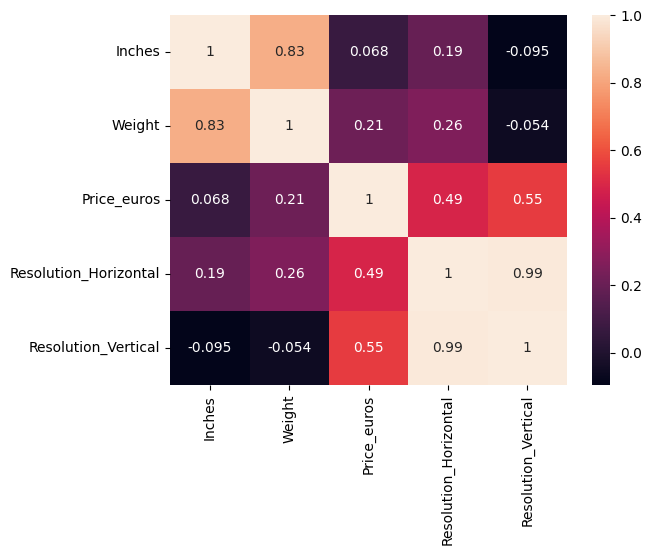

In [40]:
# Split 'ScreenResolution' into horizontal and vertical resolution
df[['Resolution_Horizontal', 'Resolution_Vertical']] = df['ScreenResolution'].str.split('x', expand=True)

# Convert 'Weight' to numeric if it's not already numeric
if df['Weight'].dtype == object:  # Check if the data type is object (i.e., string)
    df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

# Drop non-numeric columns
numeric_df = df.drop(columns=['laptop_ID', 'Company', 'Product', 'TypeName', 'OpSys', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu'])

# Convert the new resolution columns to numeric
numeric_df['Resolution_Horizontal'] = pd.to_numeric(numeric_df['Resolution_Horizontal'], errors='coerce')
numeric_df['Resolution_Vertical'] = pd.to_numeric(numeric_df['Resolution_Vertical'], errors='coerce')

# Analyze the correlation between columns
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


<ipython-input-102-102aded155bf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


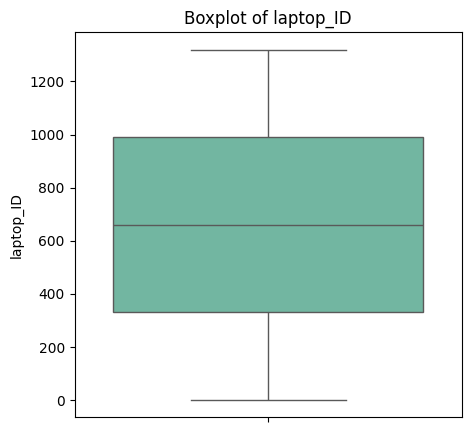

<ipython-input-102-102aded155bf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


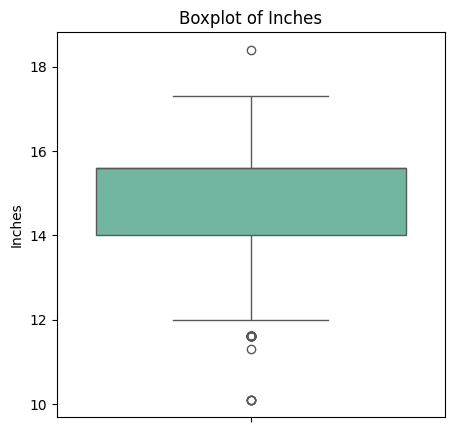

<ipython-input-102-102aded155bf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette="Set2")


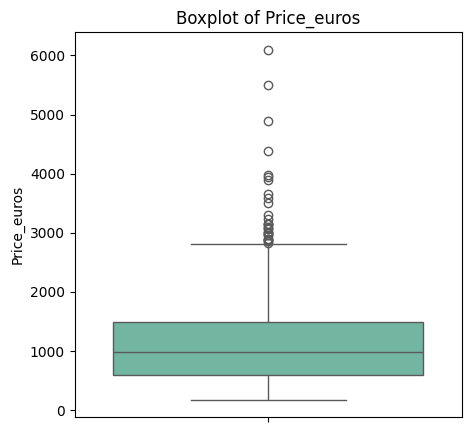

In [102]:
# Iterate through each numerical column and create a boxplot
for col in numerical_columns:
    fig = plt.figure(figsize=(5, 5))
    sns.boxplot(y=df[col], palette="Set2")
    plt.ylabel(col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [32]:
# Handle missing values
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Define preprocessing steps for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale the data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine preprocessing steps for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [29]:
# Fit and transform the data
processed_data = preprocessor.fit_transform(df)

In [30]:
# Convert the transformed data back to a DataFrame
processed_df = pd.DataFrame(processed_data)

In [31]:
# Display the first few rows of the processed DataFrame
print(processed_df.head())

                                                   0
0    (0, 0)\t-1.7299505140013571\n  (0, 1)\t-1.20...
1    (0, 0)\t-1.7273260198697626\n  (0, 1)\t-1.20...
2    (0, 0)\t-1.7247015257381684\n  (0, 1)\t0.408...
3    (0, 0)\t-1.7220770316065739\n  (0, 1)\t0.268...
4    (0, 0)\t-1.7194525374749796\n  (0, 1)\t-1.20...


In [74]:
# Assume 'Price_euros' is the target variable
X = df.drop(columns=['Price_euros'])  # Features
y = df['Price_euros']  # Target variable

# Preprocessing pipeline
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train Linear Regression model
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

# Evaluate Linear Regression model
y_pred_lr = regressor1.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error:", mse_lr)


Linear Regression Mean Squared Error: 187332.85880129592


In [75]:
# Model 1: Linear Regression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)
y_pred_lr = regressor1.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error:", mse_lr)

# Model 2: Random Forest Regressor
regressor2 = RandomForestRegressor()
regressor2.fit(X_train, y_train)
y_pred_rf = regressor2.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regressor Mean Squared Error:", mse_rf)

Linear Regression Mean Squared Error: 187332.85880129592
Random Forest Regressor Mean Squared Error: 125100.72146947724
